# Modeling

In [8]:
#Data Processing Libraries
import numpy as np
import pandas as pd

#Data Vizualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Pretty display for notebooks
%matplotlib inline

# Machine Learning Library
from sklearn.preprocessing import LabelEncoder # Encode Categorical Variable to Numerical Variable
#from sklearn.preprocessing import Imputer # Imputer Class to replace missing values
from sklearn.metrics import confusion_matrix # Library for model evaluation
from sklearn.metrics import accuracy_score # Library for model evaluation
from sklearn.model_selection import train_test_split # Library to split datset into test and train

from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# if we want to see all columns, we set this parametr on
pd.set_option('display.max_columns', None)

In [22]:
# read dataset
df = pd.read_csv("data/clean_churn.csv")

In [23]:
# onehot encoding all caterogical data
df = pd.get_dummies(df, drop_first=True)

In [11]:
df

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_Yes,onlinebackup_Yes,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


In [12]:
from sklearn.model_selection import train_test_split

# Split data into X and y
y=df['churn_Yes'].copy()

# Define X

X = df.drop(columns=['churn_Yes'], axis=1)



#importing train_test_split
from sklearn.model_selection import train_test_split
# Split the data into a training and a test set and set stratify=y to help with imbalance data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,
                                                 random_state=42,stratify=y)

df.head()

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_Yes,onlinebackup_Yes,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


In [13]:
#scale numeric features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [16]:
print(len(X_train), len(X_test))

4219 2813


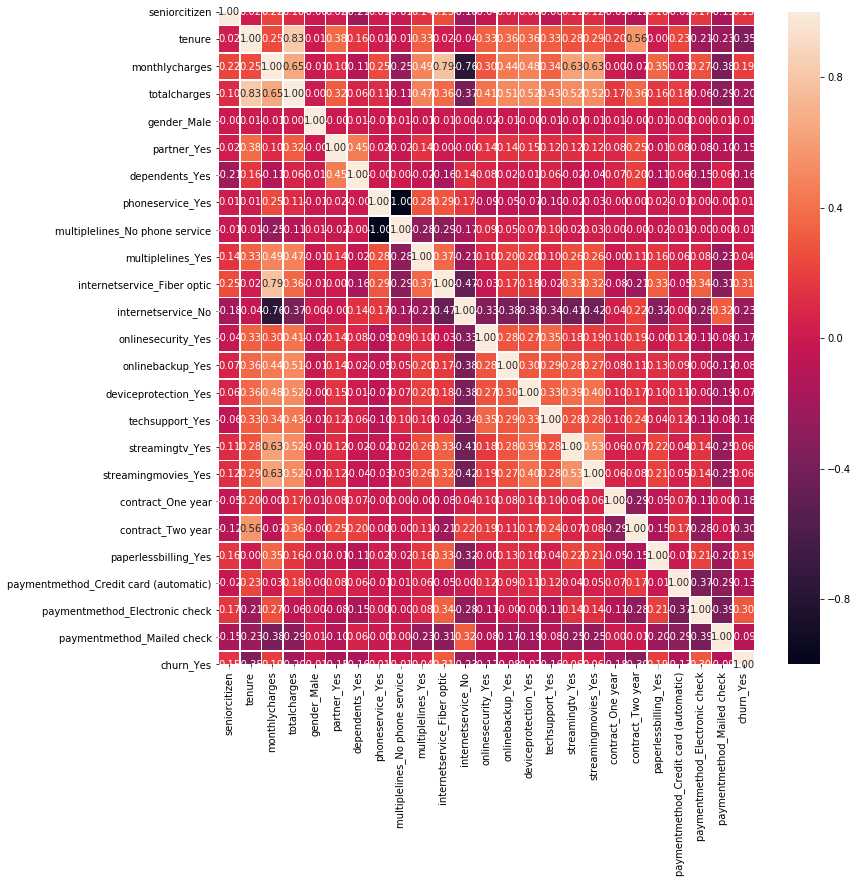

In [17]:
cols = df.columns
numer_cols = df._get_numeric_data().columns
cat_cols = list(set(cols) - set(numer_cols))
for i in cat_cols:
    df[i] = df[i].astype('category')
    df[i] = df[i].cat.codes
f,ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

In [18]:
# modeling with LogesticREgression
#create an instance and fit the model 
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

#predictions
y_hat_train=logmodel.predict(X_train)
y_hat_test = logmodel.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate predictions
print('-'*40)
print('Accuracy score for Training Dataset = ', accuracy_score(y_train, y_hat_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test, y_hat_test))


print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_hat_test))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_hat_test))

----------------------------------------
Accuracy score for Training Dataset =  0.8084854230860393
Accuracy score for Testing Dataset =  0.8002132954141487
----------------------------------------
Confusion Matrix:
[[1819  246]
 [ 316  432]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      2065
           1       0.64      0.58      0.61       748

    accuracy                           0.80      2813
   macro avg       0.74      0.73      0.74      2813
weighted avg       0.79      0.80      0.80      2813



In [7]:
#Converting Gender column to numeric value
#datset_churn['Gender'].unique() # Print unique values in the column
df['gender_num'] = df['gender'].map( {'Female': 1, 'Male': 0} ).astype(int) #Map Categorical to Numerical Values
# For Partner & Dependant , we created Family Column . Converting Family column to numeric value
#datset_churn['Family'].unique() # Print unique values in the column
df['family_num'] = df['partner'].map( {'Yes': 1, 'No': 0} ).astype(int) #Map Categorical to Numerical Values
df.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn,gender_num
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No,0
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No,1
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes,0


In [24]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
df = pd.get_dummies(df)

df

,seniorcitizen,tenure,monthlycharges,totalcharges,gender_Male,partner_Yes,dependents_Yes,phoneservice_Yes,multiplelines_No phone service,multiplelines_Yes,internetservice_Fiber optic,internetservice_No,onlinesecurity_Yes,onlinebackup_Yes,deviceprotection_Yes,techsupport_Yes,streamingtv_Yes,streamingmovies_Yes,contract_One year,contract_Two year,paperlessbilling_Yes,paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check,churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,0,2,53.85,108.15,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,24,84.80,1990.50,1,1,1,1,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,1,0
7028,0,72,103.20,7362.90,0,1,1,1,0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,0
7029,0,11,29.60,346.45,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0
7030,1,4,74.40,306.60,1,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1


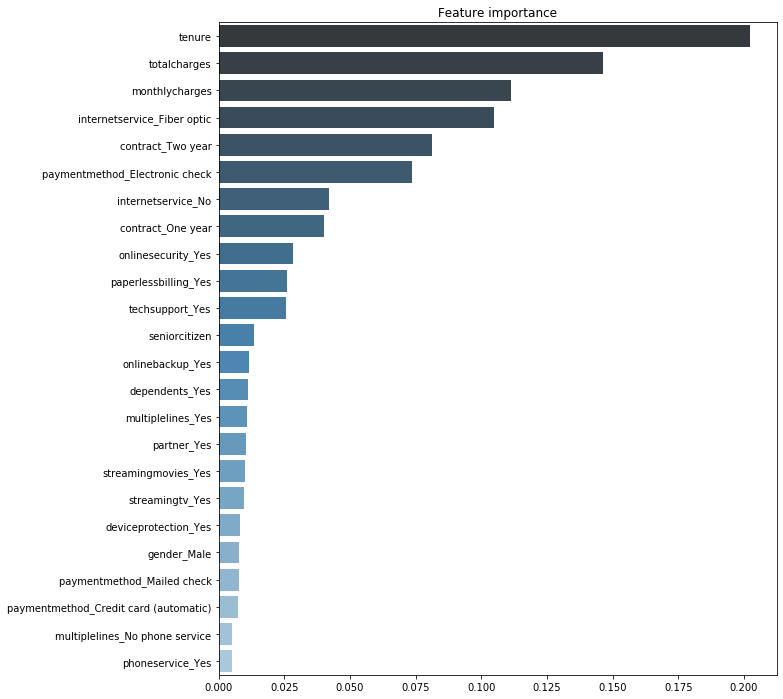

In [32]:
# Split data into X and y
y=df['churn_Yes'].copy()

# Define X

x = df.drop(columns=['churn_Yes'], axis=1)

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)

# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Blues_d", orient='h')



In [33]:
df2 = pd.read_csv("data/clean_churn.csv")

df2.replace(to_replace='Yes', value=1, inplace=True)
df2.replace(to_replace='No', value=0, inplace=True)
df2['gender'].replace(to_replace='Male', value=1, inplace=True)
df2['gender'].replace(to_replace='Female', value=0, inplace=True)

In [44]:
df2.tail(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
7029,0,0,1,1,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7030,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1
7031,1,0,0,0,66,1,0,Fiber optic,1,0,1,1,1,1,Two year,1,Bank transfer (automatic),105.65,6844.50,0


In [45]:
new_df = df2.iloc[:, :-3]
df_cat = pd.get_dummies(new_df)
df_cat.head(7)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,paperlessbilling,multiplelines_0,multiplelines_1,multiplelines_No phone service,internetservice_0,internetservice_DSL,internetservice_Fiber optic,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0
5,0,0,0,0,8,1,0,0,1,0,1,1,1,0,1,0,0,0,1,1,0,0,0,0,1,0
6,1,0,0,1,22,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0


In [38]:
# Sklearn imports
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#from xgboost import XGBClassifier

In [39]:
X = df_cat
y = df2['churn'].values

features = X.columns.values
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Accuracy: 0.8009950248756219 

gender                                     0.021644
seniorcitizen                              0.265778
partner                                    0.031936
dependents                                -0.216187
tenure                                    -2.467811
phoneservice                              -0.118234
onlinesecurity                            -0.289306
onlinebackup                              -0.124049
deviceprotection                           0.100021
techsupport                               -0.324114
streamingtv                                0.209617
streamingmovies                            0.304229
paperlessbilling                           0.361548
multiplelines_0                           -0.206462
multiplelines_1                            0.088228
multiplelines_No phone service             0.118497
internetservice_0                         -0.754511
internetservice_DSL                       -0.061613
internetservice_Fiber optic      

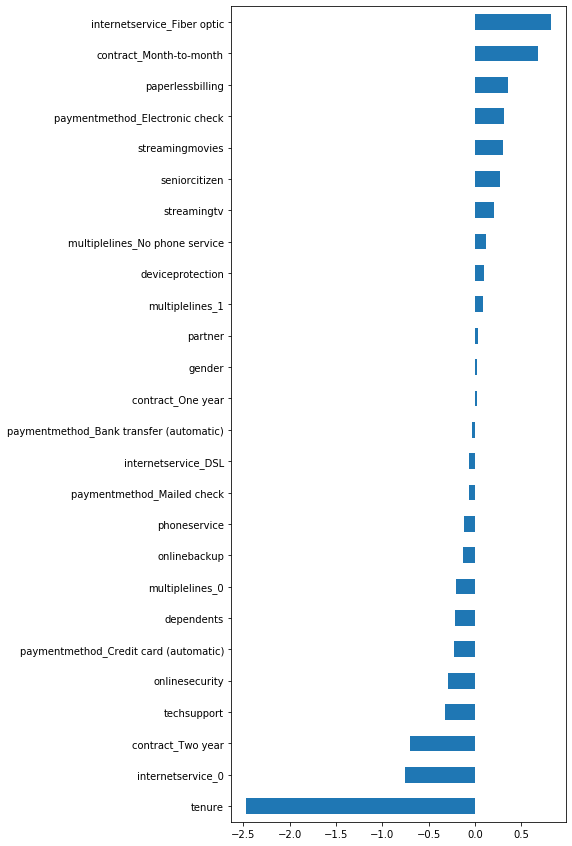

In [40]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

pred_log_reg = log_reg.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, pred_log_reg), '\n')

# To get the weights of all the variables
weights_LogReg = pd.Series(log_reg.coef_[0], index=X.columns.values)
print(weights_LogReg)
plt.figure(figsize=(6, 15))
weights_LogReg.sort_values().plot(kind='barh')

As we can see, some variables are negatively correlated with the predicted variable (Churn), while some have positively. Negative correlation means that likeliness of churn decreases with that variable.

Let me interpret some findings from above plot,

As we have seen in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions.
Total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it.
I don't understad why this is happening.

Till the time let's have a look at other algorithms.

Accuracy: 0.7981520966595593 

gender                                     0.002350
seniorcitizen                              0.012777
partner                                    0.007424
dependents                                 0.010901
tenure                                     0.219452
phoneservice                               0.003070
onlinesecurity                             0.021355
onlinebackup                               0.009094
deviceprotection                           0.003446
techsupport                                0.019687
streamingtv                                0.007167
streamingmovies                            0.008607
paperlessbilling                           0.027535
multiplelines_0                            0.005979
multiplelines_1                            0.007258
multiplelines_No phone service             0.003290
internetservice_0                          0.047772
internetservice_DSL                        0.021679
internetservice_Fiber optic      

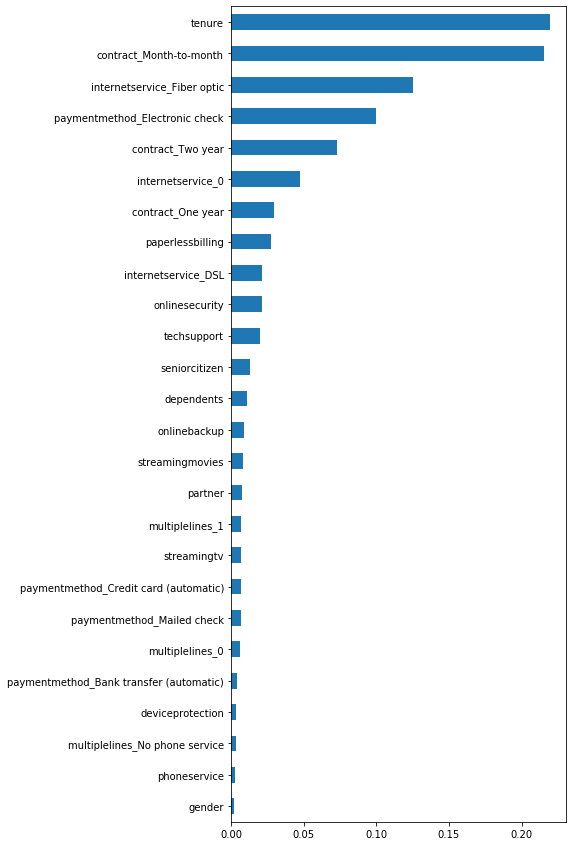

In [41]:
rf = RandomForestClassifier(n_estimators=1000,
                            oob_score = True,
                            n_jobs = -1,
                            random_state =50,
                            max_features = "auto",
                            max_leaf_nodes = 30)
rf.fit(X_train, y_train)

# Make predictions
pred_rf = rf.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, pred_rf), '\n')
importances = rf.feature_importances_
weights_RanFor = pd.Series(importances,
                 index=X.columns.values)
print(weights_RanFor)
plt.figure(figsize=(6, 15))
weights_RanFor.sort_values().plot(kind = 'barh')

From random forest algorithm, monthly contract, tenure and total charges are the most important predictor variables to predict churn.
The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

Accuracy: 0.8052594171997157 

gender                                     0.00
seniorcitizen                              0.02
partner                                    0.00
dependents                                 0.02
tenure                                     0.50
phoneservice                               0.00
onlinesecurity                             0.02
onlinebackup                               0.02
deviceprotection                           0.02
techsupport                                0.04
streamingtv                                0.04
streamingmovies                            0.02
paperlessbilling                           0.02
multiplelines_0                            0.04
multiplelines_1                            0.00
multiplelines_No phone service             0.00
internetservice_0                          0.02
internetservice_DSL                        0.02
internetservice_Fiber optic                0.04
contract_Month-to-month                    0.06
contract_

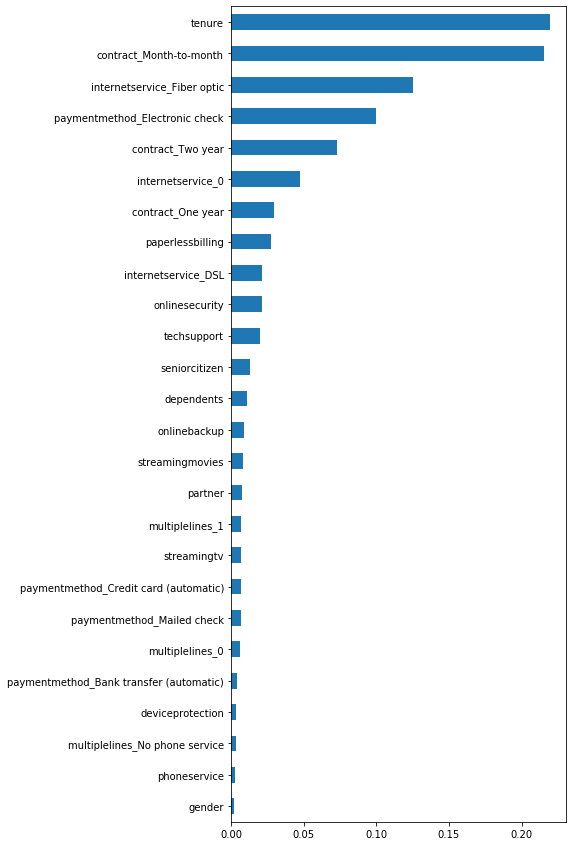

In [42]:
model_AdaB = AdaBoostClassifier()
model_AdaB.fit(X_train,y_train)
preds_adaB = model_AdaB.predict(X_test)
metrics.accuracy_score(y_test, preds_adaB)
print('Accuracy:', metrics.accuracy_score(y_test, preds_adaB), '\n')
importances = model_AdaB.feature_importances_
weights_AdaB = pd.Series(importances,
                 index=X.columns.values)
print(weights_AdaB)
plt.figure(figsize=(6, 15))
weights_RanFor.sort_values().plot(kind = 'barh')

In [43]:
model_svm = SVC(kernel='linear') 
model_svm.fit(X_train, y_train)
pred_svm = model_svm.predict(X_test)
print('Accuracy:', metrics.accuracy_score(y_test, pred_svm), '\n')

feature_importance = list(zip(model_svm.coef_[0], X.columns.values))
print(feature_importance)

Accuracy: 0.8045486851457001 

[(-0.007251657397659983, 'gender'), (0.19329346852407525, 'seniorcitizen'), (0.054695976368918764, 'partner'), (-0.1289593590529421, 'dependents'), (-2.338362246035558, 'tenure'), (-0.16073918611937188, 'phoneservice'), (-0.24787984863954193, 'onlinesecurity'), (-0.12888678463241376, 'onlinebackup'), (0.03394100820906942, 'deviceprotection'), (-0.28236607977237327, 'techsupport'), (0.10944500660923495, 'streamingtv'), (0.20990477485531756, 'streamingmovies'), (0.21238121660474008, 'paperlessbilling'), (-0.18301120708406415, 'multiplelines_0'), (0.022272020964692274, 'multiplelines_1'), (0.16073918611942872, 'multiplelines_No phone service'), (-0.5566386748537013, 'internetservice_0'), (-0.28561647914239074, 'internetservice_DSL'), (0.8422551539962342, 'internetservice_Fiber optic'), (0.17777663223159834, 'contract_Month-to-month'), (-0.15041225173507655, 'contract_One year'), (-0.027364380496742058, 'contract_Two year'), (-0.02865371721622978, 'paymentmet

With SVM-Linear Kernel, I am able to achieve the slightly higher than all accuracy on test data to almost 80.19%.

In [ ]:
#Convertin the predictor variable in a binary numeric variable
df['churn'].replace(to_replace='Yes', value=1, inplace=True)
df['churn'].replace(to_replace='No',  value=0, inplace=True)

#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df)
df_dummies.head()

# We will use the data frame where we had created dummy variables
y = df_dummies['churn'].values
X = df_dummies.drop(columns = ['churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [ ]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear')
result = model.fit(X_train, y_train)

In [ ]:
result

In [ ]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

In [ ]:
#predictions
y_hat_train=model.predict(X_train)
y_hat_test = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate predictions
print('-'*40)
print('Accuracy score for Training Dataset = ', accuracy_score(y_train, y_hat_train))
print('Accuracy score for Testing Dataset = ', accuracy_score(y_test, y_hat_test))


print('-'*40)
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_hat_test))

print('-'*40)
print('Classification Matrix:')
print(classification_report(y_test, y_hat_test))

In [ ]:

#scale numeric features 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# Scale the train and test data
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 41)

smote = SMOTE()

X_train_resampled, y_train_resampled = sm.fit_sample(X_train,y_train)
X_train_resampled = pd.DataFrame(data=X_train_resampled,columns=columns )
y_train_resampled = pd.DataFrame(data=y_train_resampled,columns=["churn"])
# we can Check the numbers of our data 

X_train_resampled, y_train_resampled = smote.fit_sample(X_train, y_train) 
print(pd.Series(y_train_resampled).value_counts())

In [ ]:
!pip install scipy

In [ ]:
# read dataset
df = pd.read_csv("data/clean_churn.csv")

In [ ]:
X = df.iloc[:,1:16].values # Feature Variable
y = df.iloc[:,16].values # Target Variable

#Dividing data into test & train splitting 70% data for training anf 30% for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

In [ ]:
# Making a list of all classifiers
classifier_model = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),RandomForestClassifier(), SGDClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_model_list= []
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []

for classifier_list in classifier_model:
    classifier = classifier_list
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_list.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(X_test)
    except:
        y_pred_score = classifier.predict_proba(X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    
    
    #Confusion Matrix
    plot_confusion_matrix(classifier_list.__class__.__name__, y_test, y_pred_test)
    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)